In [ ]:
import numpy as np #array

In [ ]:
import pandas as pd #dataset

In [ ]:
import seaborn as sns #visualization

In [ ]:
from sklearn.preprocessing import StandardScaler #preprocessing

In [ ]:
from sklearn.model_selection import train_test_split #splitting

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv') #loading dataset

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
dataset.shape #numer of rows and columns


(768, 9)

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset['Outcome'].value_counts() # number of 0 and 1

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

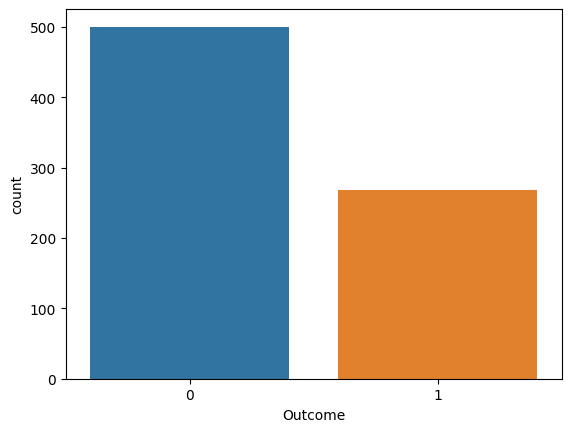

In [ ]:
sns.countplot(x='Outcome', data=dataset) #visualization #countplot only 1 argument

<Axes: xlabel='Pregnancies', ylabel='count'>

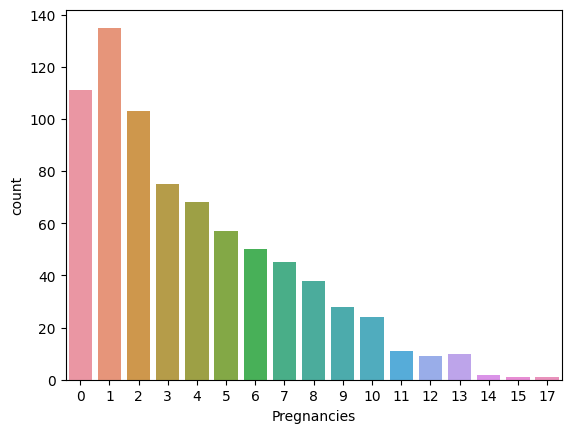

In [ ]:
sns.countplot(x='Pregnancies', data=dataset)

<Axes: xlabel='SkinThickness', ylabel='count'>

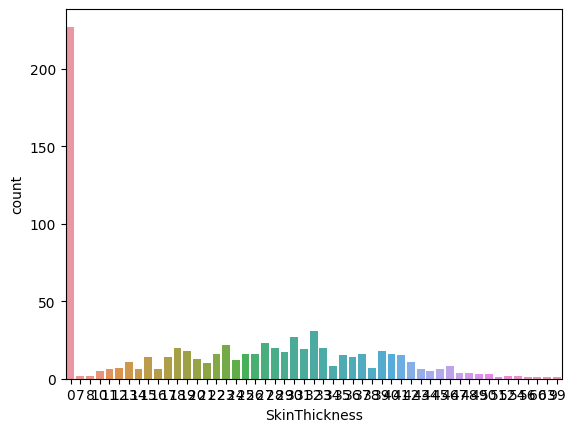

In [ ]:
sns.countplot(x='SkinThickness', data=dataset)

<Axes: xlabel='Outcome', ylabel='BMI'>

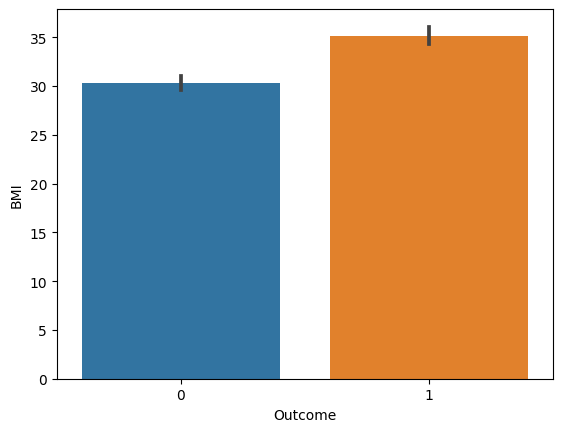

In [ ]:
sns.barplot(x='Outcome',y='BMI', data=dataset) #barplot 2 argument

<Axes: xlabel='Insulin', ylabel='Age'>

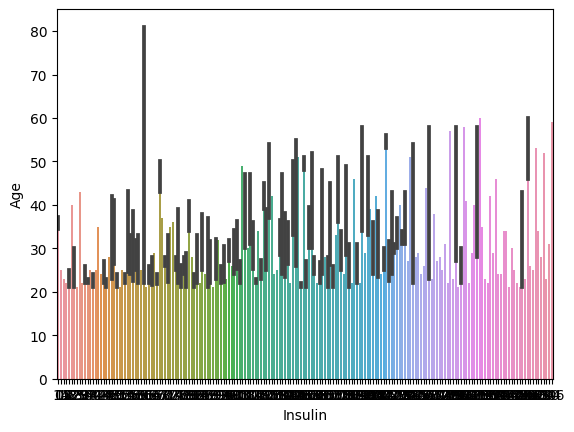

In [ ]:
sns.barplot(x='Insulin',y='Age', data=dataset)

In [ ]:
x = dataset.drop(columns = 'Outcome',axis = 1) #exclude that column

In [ ]:
y = dataset['Outcome']

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
scaler = StandardScaler() #variable

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
std_data = scaler.transform(x)

In [ ]:
print(std_data) #standradized x value

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
x = std_data

In [ ]:
y = dataset['Outcome']

In [ ]:
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state= 42) #stratify divides the 0 and 1 equally for train and test ,used to maintain accuracy

In [ ]:
print(x.shape,x_train)

(768, 8) [[-0.84488505 -0.96691063 -0.36733675 ... -0.6082704   0.3265464
  -0.78628618]
 [ 0.3429808   0.1597866   0.45982725 ... -0.30366421 -0.09929033
   0.57511787]
 [-0.54791859 -0.49745345 -0.57412775 ...  0.36900779 -0.74559573
  -0.70119842]
 ...
 [-0.84488505 -0.74783062  0.04624525 ...  0.77514938 -0.76673656
  -0.27575966]
 [ 1.82781311 -0.30967058  0.04624525 ... -0.57019463 -0.9992857
   0.57511787]
 [ 0.04601433  0.72313521 -0.57412775 ... -0.31635613 -0.55834837
   0.31985461]]


In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_train_pred = classifier.predict(x_train)
tranning_acc = accuracy_score(x_train_pred, y_train)

In [ ]:
print("Training Accuracy:",tranning_acc)

Training Accuracy: 0.7915309446254072


In [ ]:
x_test_pred = classifier.predict(x_test)
testing_acc = accuracy_score(x_test_pred, y_test)

In [ ]:
print("Testing Accuracy:",testing_acc)

Testing Accuracy: 0.7207792207792207


In [ ]:
input_data = (1,85,66,29,0,26.6,0.351,31) # testing our model


In [ ]:
datanp = np.asarray(input_data)

In [ ]:
data_reshaped = datanp.reshape(1,-1)

In [ ]:
std_data = scaler.transform(data_reshaped)
print(std_data)

[[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
predication = classifier.predict(std_data)
print(predication)

[0]


In [ ]:
if(predication[0] == 0):
   print('Not diabetic')
else:
    print('diabetic')

Not diabetic
